#**Part 1: Dataset Preparation**

In [1]:
import kagglehub
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("camnugent/california-housing-prices")

# Load the dataset (assuming it's a CSV file)
csv_file_path = path + "/housing.csv"  # Adjust the file name if it's different
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print("Path to dataset files:", path)
print("Dataset Preview:")
print(data.head())


100%|██████████| 400k/400k [00:00<00:00, 37.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1
Dataset Preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0  

#**Part 2: Data Visualization**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


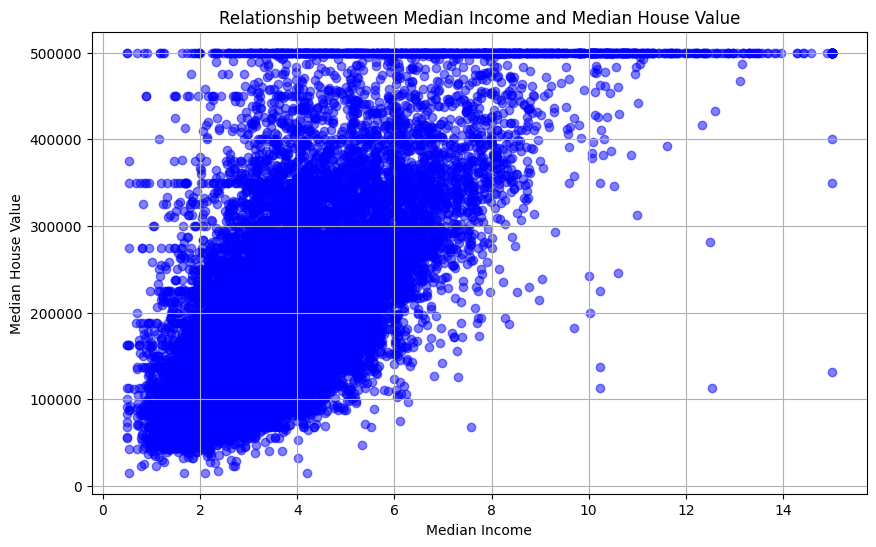

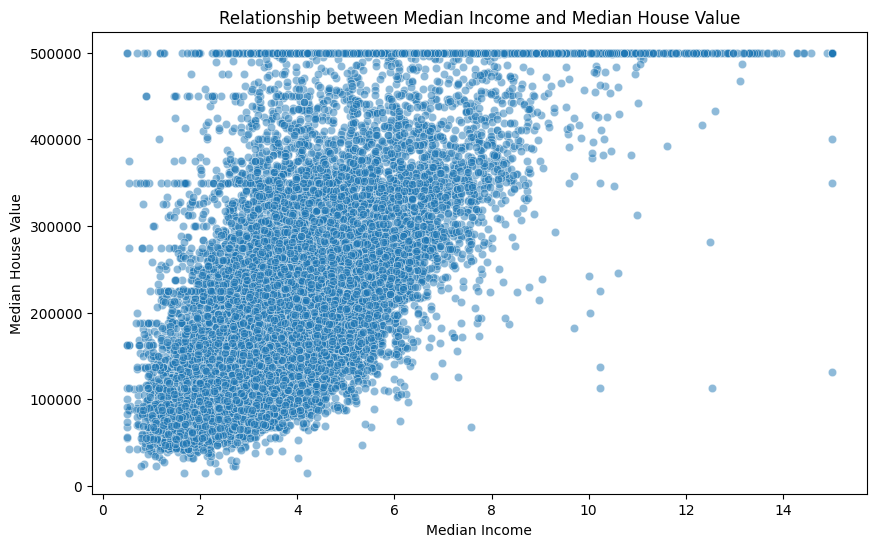

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


# Replace <folder_path> with the actual folder path in Google Drive
file_path = '/content/drive/My Drive/IDS-Assignment SLR/housing.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Scatter Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5, c='pink')
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

# Scatter Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data, alpha=0.5)
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()



#**Part 3: Implementing Simple Linear Regression**

Mean Squared Error: 7091157771.76555
R² Score: 0.45885918903846656


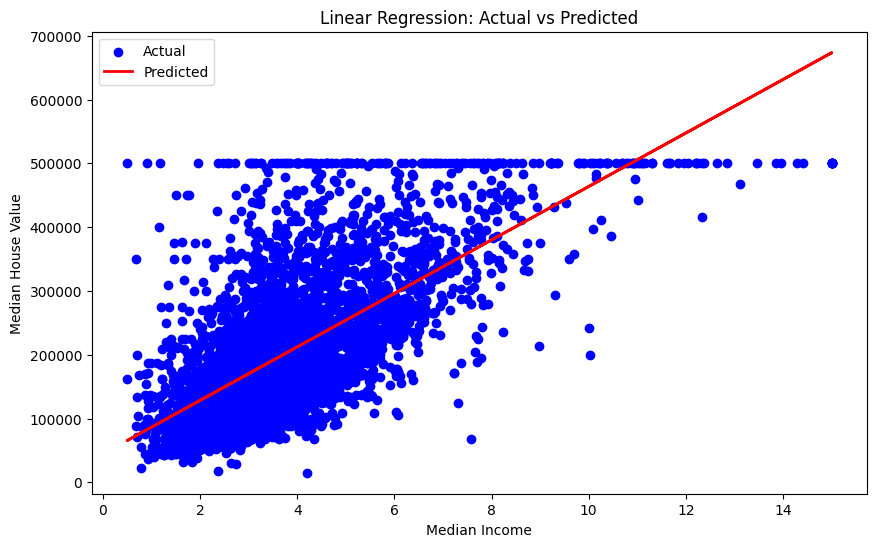

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace with your actual path)
file_path = '/content/drive/My Drive/IDS-Assignment SLR/housing.csv'
data = pd.read_csv(file_path)

# Select independent variable (feature) and dependent variable (target)
X = data[['median_income']]  # Feature: Median income
y = data['median_house_value']  # Target: Median house value

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='pink', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()


#**Part 4: Loss Function Calculation**

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions on training data
y_train_pred = model.predict(X_train)

# Calculate MSE for training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for testing set
mse_test = mean_squared_error(y_test, y_pred)

# Print the MSE values
print("Mean Squared Error on Training Set:", mse_train)
print("Mean Squared Error on Testing Set:", mse_test)


Mean Squared Error on Training Set: 6991447170.182823
Mean Squared Error on Testing Set: 7091157771.76555


### **Explanation of Mean Squared Error (MSE)**

#### **Definition:**

The **Mean Squared Error (MSE)** is a common loss function used to evaluate the performance of regression models. It is calculated as the average of the squared differences between the actual and predicted values. The formula for MSE is:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:

- $y_i$ is the actual value for the $i$-th data point.
- $\hat{y}_i$ is the predicted value for the $i$-th data point.
- $n$ is the total number of data points.

#### **Purpose:**

- **MSE for Training Set:** Measures how well the model fits the training data. A lower MSE indicates that the model has learned to predict the training data accurately.
  
- **MSE for Testing Set:** Indicates how well the model generalizes to unseen data. A lower MSE on the testing set means the model can generalize well to new data.

#### **Interpretation:**

- **Smaller MSE values** indicate that the predicted values are closer to the actual values.
- A **large gap** between the training and testing MSE may indicate either:
  - **Overfitting:** The model performs well on the training data but poorly on the testing data. This means the model is too tailored to the training set and fails to generalize to new data.
  - **Underfitting:** The model performs poorly on both training and testing data, indicating that it hasn't learned the underlying pattern of the data well.

#### **Context of Loss in the Model:**

The **loss function** (like MSE) helps quantify the error made by the model during both the training and testing phases. Optimization algorithms (e.g., **Gradient Descent**) use the loss function to adjust the model parameters (such as coefficients and intercepts in linear regression) to minimize the error.

In this case:
- If **`mse_train`** is significantly lower than **`mse_test`**, it suggests that the model may not generalize well to new, unseen data (overfitting).
- If both **`mse_train`** and **`mse_test`** are high, it indicates that the model is not capturing the underlying patterns in the data effectively (underfitting).

This analysis ensures that the model's performance is evaluated not just on the training data, but also on unseen data, which is crucial for assessing its real-world applicability.


#**Part 5: Cost Function Analysis**

# Cost Function Analysis

## 1. Difference Between Loss Function and Cost Function

### **Loss Function:**
A **loss function** measures how well a model’s prediction matches the true value for a single data point. In other words, it evaluates the error for each individual prediction.

**Example:**  
For regression tasks, the **Mean Squared Error (MSE)** is commonly used as a loss function. It calculates the squared difference between the predicted and actual values for each data point.

### **Cost Function:**
A **cost function**, on the other hand, is a general term that refers to the aggregate of the loss function over the entire dataset. It measures the average error across all predictions.

In most cases, the cost function is simply the mean of all individual loss values. For regression models, the cost function is typically the **Mean Squared Error (MSE)**, calculated over the entire dataset.

Thus, while a **loss function** focuses on individual errors, the **cost function** gives an overall performance assessment of the model by aggregating these errors.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/drive/My Drive/IDS-Assignment SLR/housing.csv'
data = pd.read_csv(file_path)

# Feature and target selection
X = data[['median_income']]  # Feature: Median income
y = data['median_house_value']  # Target: Median house value

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for both training and testing datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Mean Squared Error (Cost Function) on Training Set:", mse_train)
print("Mean Squared Error (Cost Function) on Testing Set:", mse_test)


Mean Squared Error (Cost Function) on Training Set: 6991447170.182823
Mean Squared Error (Cost Function) on Testing Set: 7091157771.76555


# Model Evaluation

## **1. Evaluation Metrics**

### **R-squared (R²):**
- The **R-squared** value, also known as the coefficient of determination, measures the proportion of variance in the dependent variable that is predictable from the independent variable(s).
- **Range:**
  - 0 to 1 (for simple linear regression).
  - Closer to 1 indicates a better fit, where the model explains most of the variability in the target data.
  - A value close to 0 suggests the model does not explain the variability well.

### **Mean Absolute Error (MAE):**
- The **Mean Absolute Error** calculates the average magnitude of the errors in the model's predictions, without considering their direction.
- **Formula:**  
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

Where $y_i$ is the actual value and $\hat{y}_i$ is the predicted value.

- **Interpretation:**
  - A lower MAE indicates that the model's predictions are closer to the actual values on average.
  - It is measured in the same units as the target variable, making it easy to interpret.

---

## **2. Interpretation of Metrics**

### **R-squared (R²):**
- A high R² value (e.g., 0.85) means the model explains 85% of the variance in the dependent variable, indicating a good fit.
- A low R² value (e.g., 0.2) suggests the model does not capture the data's variability well and may need improvement (e.g., adding features or using a different algorithm).

### **Mean Absolute Error (MAE):**
- MAE provides a straightforward interpretation of how far predictions deviate from actual values on average.
- For example:
  - If MAE = 500, on average, the model's predictions are off by 500 units.
  - Lower MAE values indicate better model accuracy.

### **Combining Insights:**
- **High R² and low MAE:** The model is well-fitted and accurate.
- **Low R² and high MAE:** The model struggles to explain the data and produces inaccurate predictions.
- **Moderate R² and moderate MAE:** The model may be adequate but could benefit from further optimization.


#**Part 6: Model Evaluation**

# How This Analysis Helps in Understanding Model Performance

### **Loss Function:**
The **loss function** measures how accurate the model's predictions are for each individual data point. It helps to identify errors in predictions on a case-by-case basis.

### **Cost Function:**
The **cost function** provides an overall assessment of the model's performance by averaging the losses over the entire dataset. By minimizing the cost function (i.e., reducing MSE), the model's predictions improve.

---

## **Model Performance Insights:**

- **Low MSE on Both Training and Testing Datasets:**
  Indicates that the model is making accurate predictions for both seen and unseen data.

- **High MSE on Both Training and Testing Datasets:**
  Suggests that the model is underfitting, meaning it is too simple and not capturing the complexities of the data.

- **Large Difference in MSE Between Training and Testing Sets:**
  Could indicate that the model is overfitting to the training data, meaning it performs well on training data but poorly on unseen data.
